# HR ANALYTICS (Dataset)

### Our example concerns a big company that wants to understand why some of their best and most experienced employees are leaving prematurely. The company also wishes to predict which valuable employees will leave next.

## Importing libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np


import warnings
warnings.filterwarnings(action='ignore')
import emoji as em

## Accessing the data

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## checking missing data using heatmap

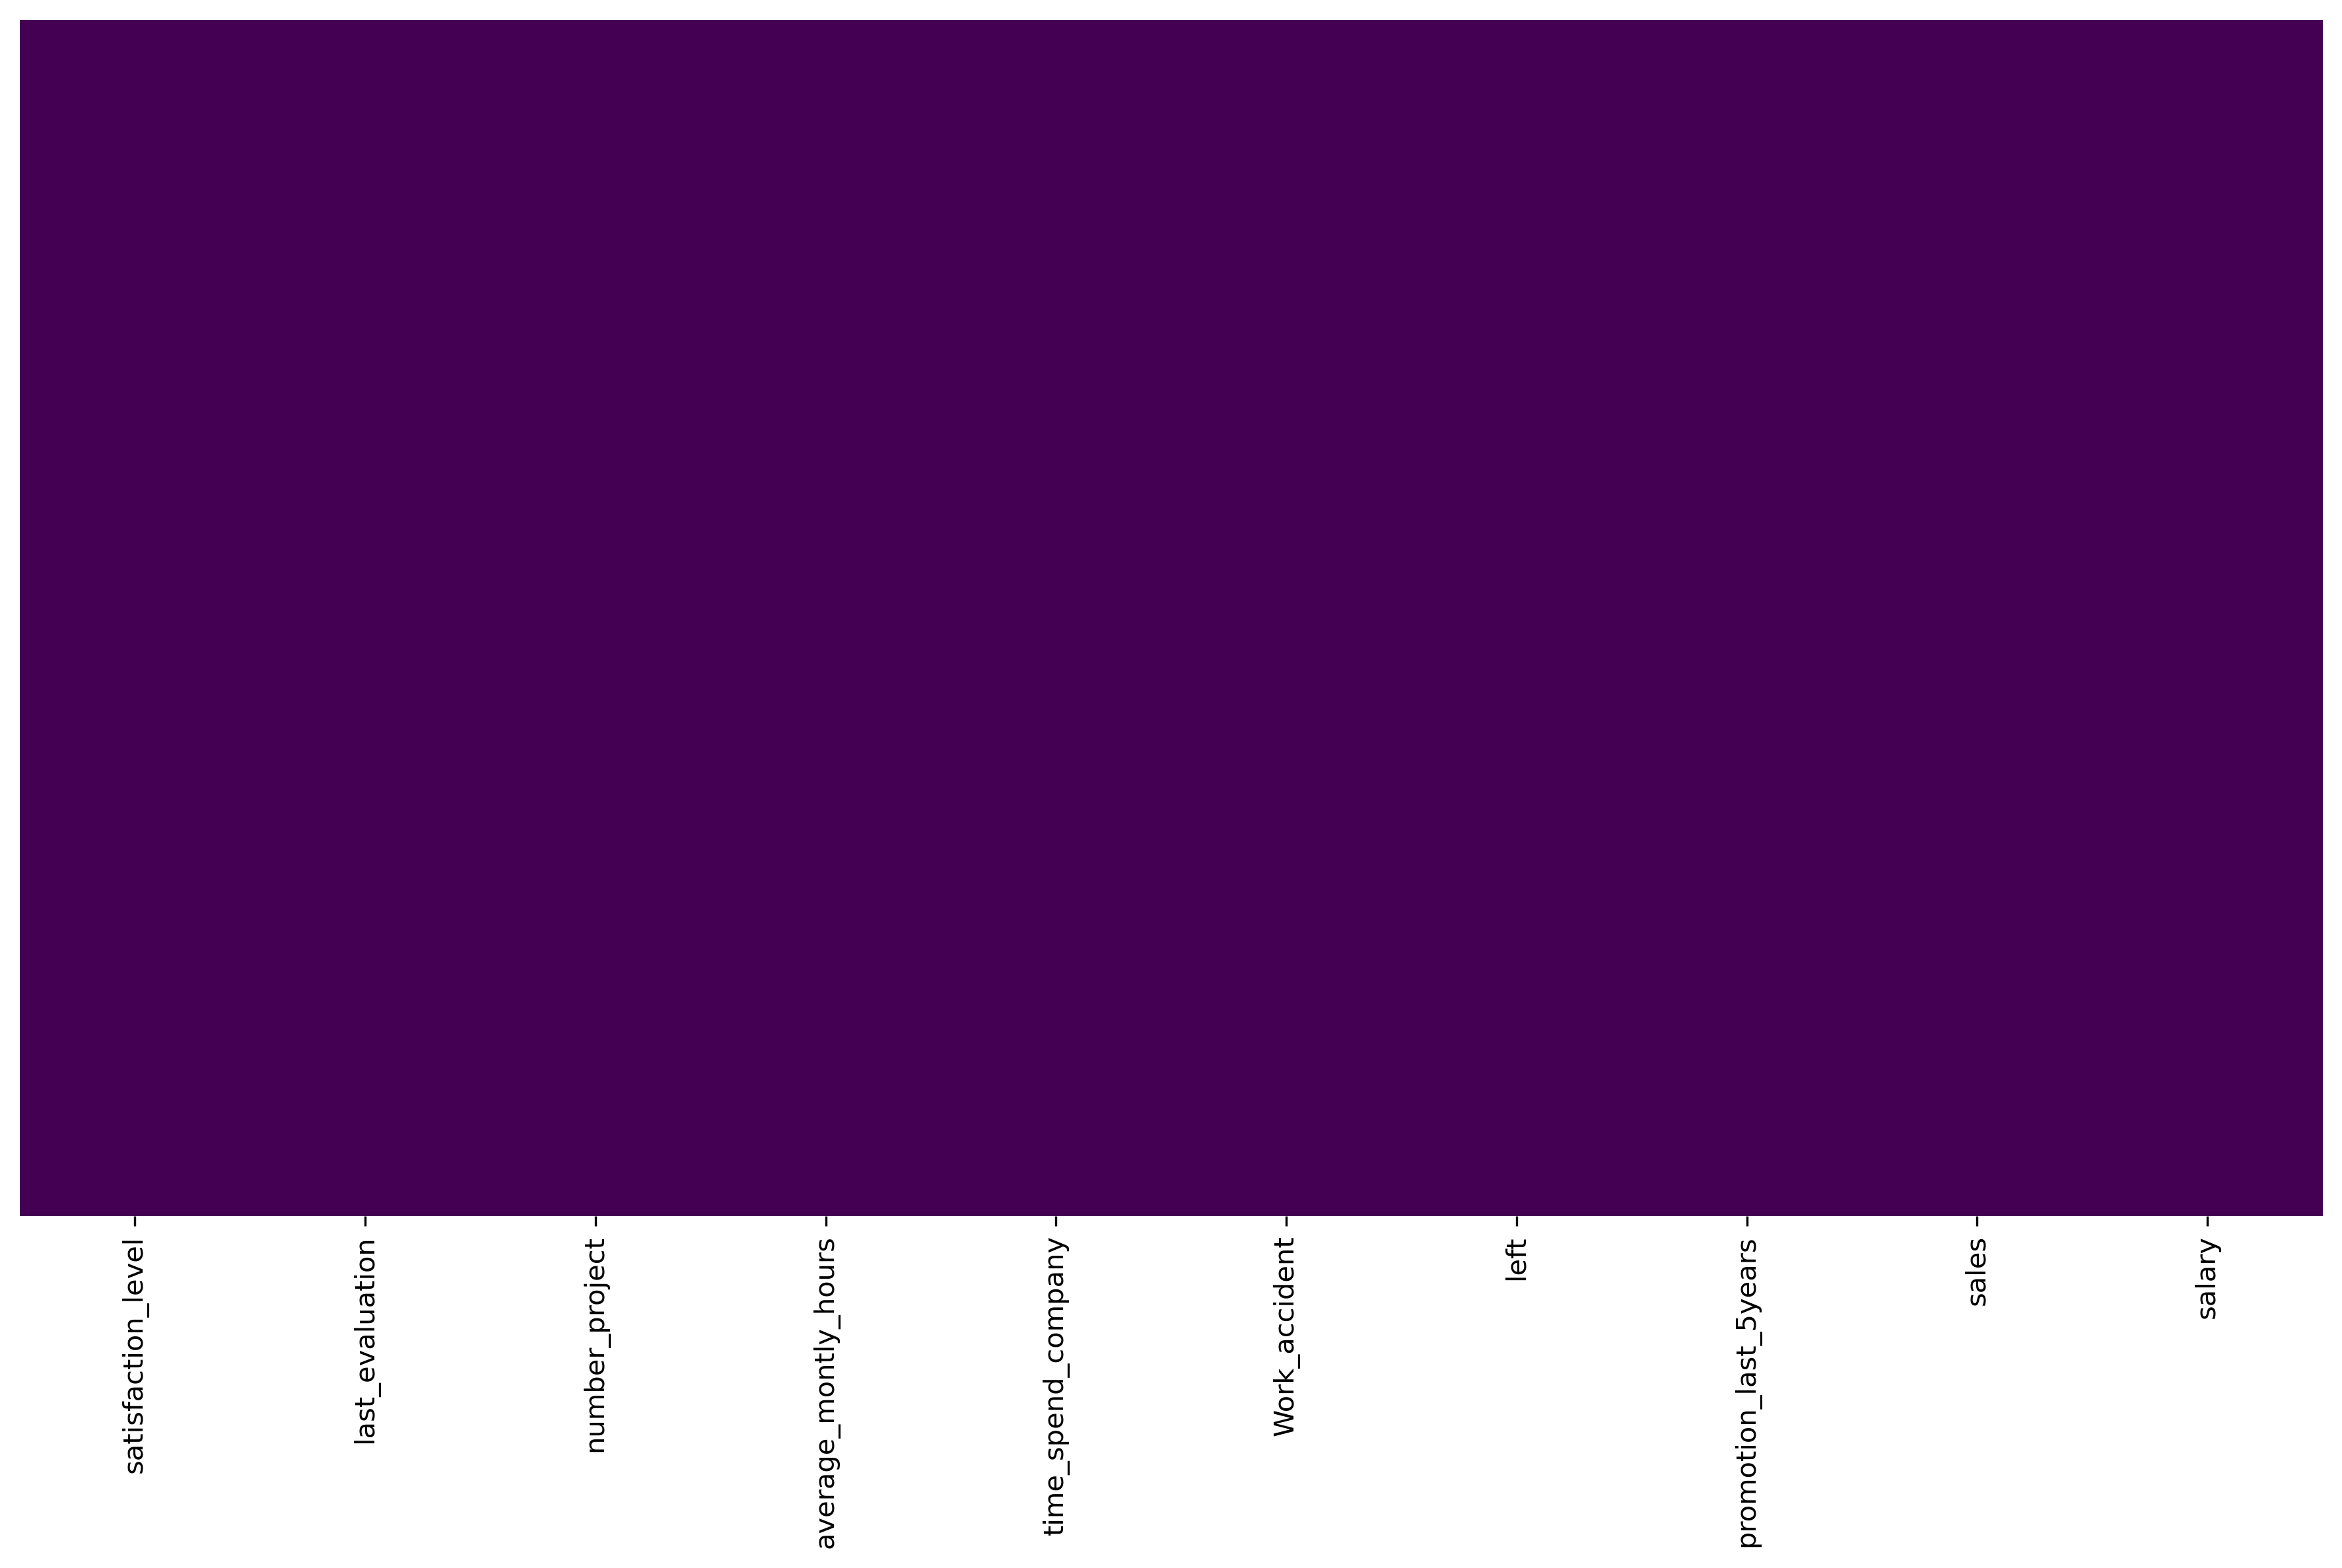

In [7]:
plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(data=df.isnull(),cmap='viridis',cbar=False,yticklabels=False);

## Data is ready to deal with the logistic regression....

## EDA (Exploratory Data Analysis)

In [8]:
corr=df.corr()

In [9]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


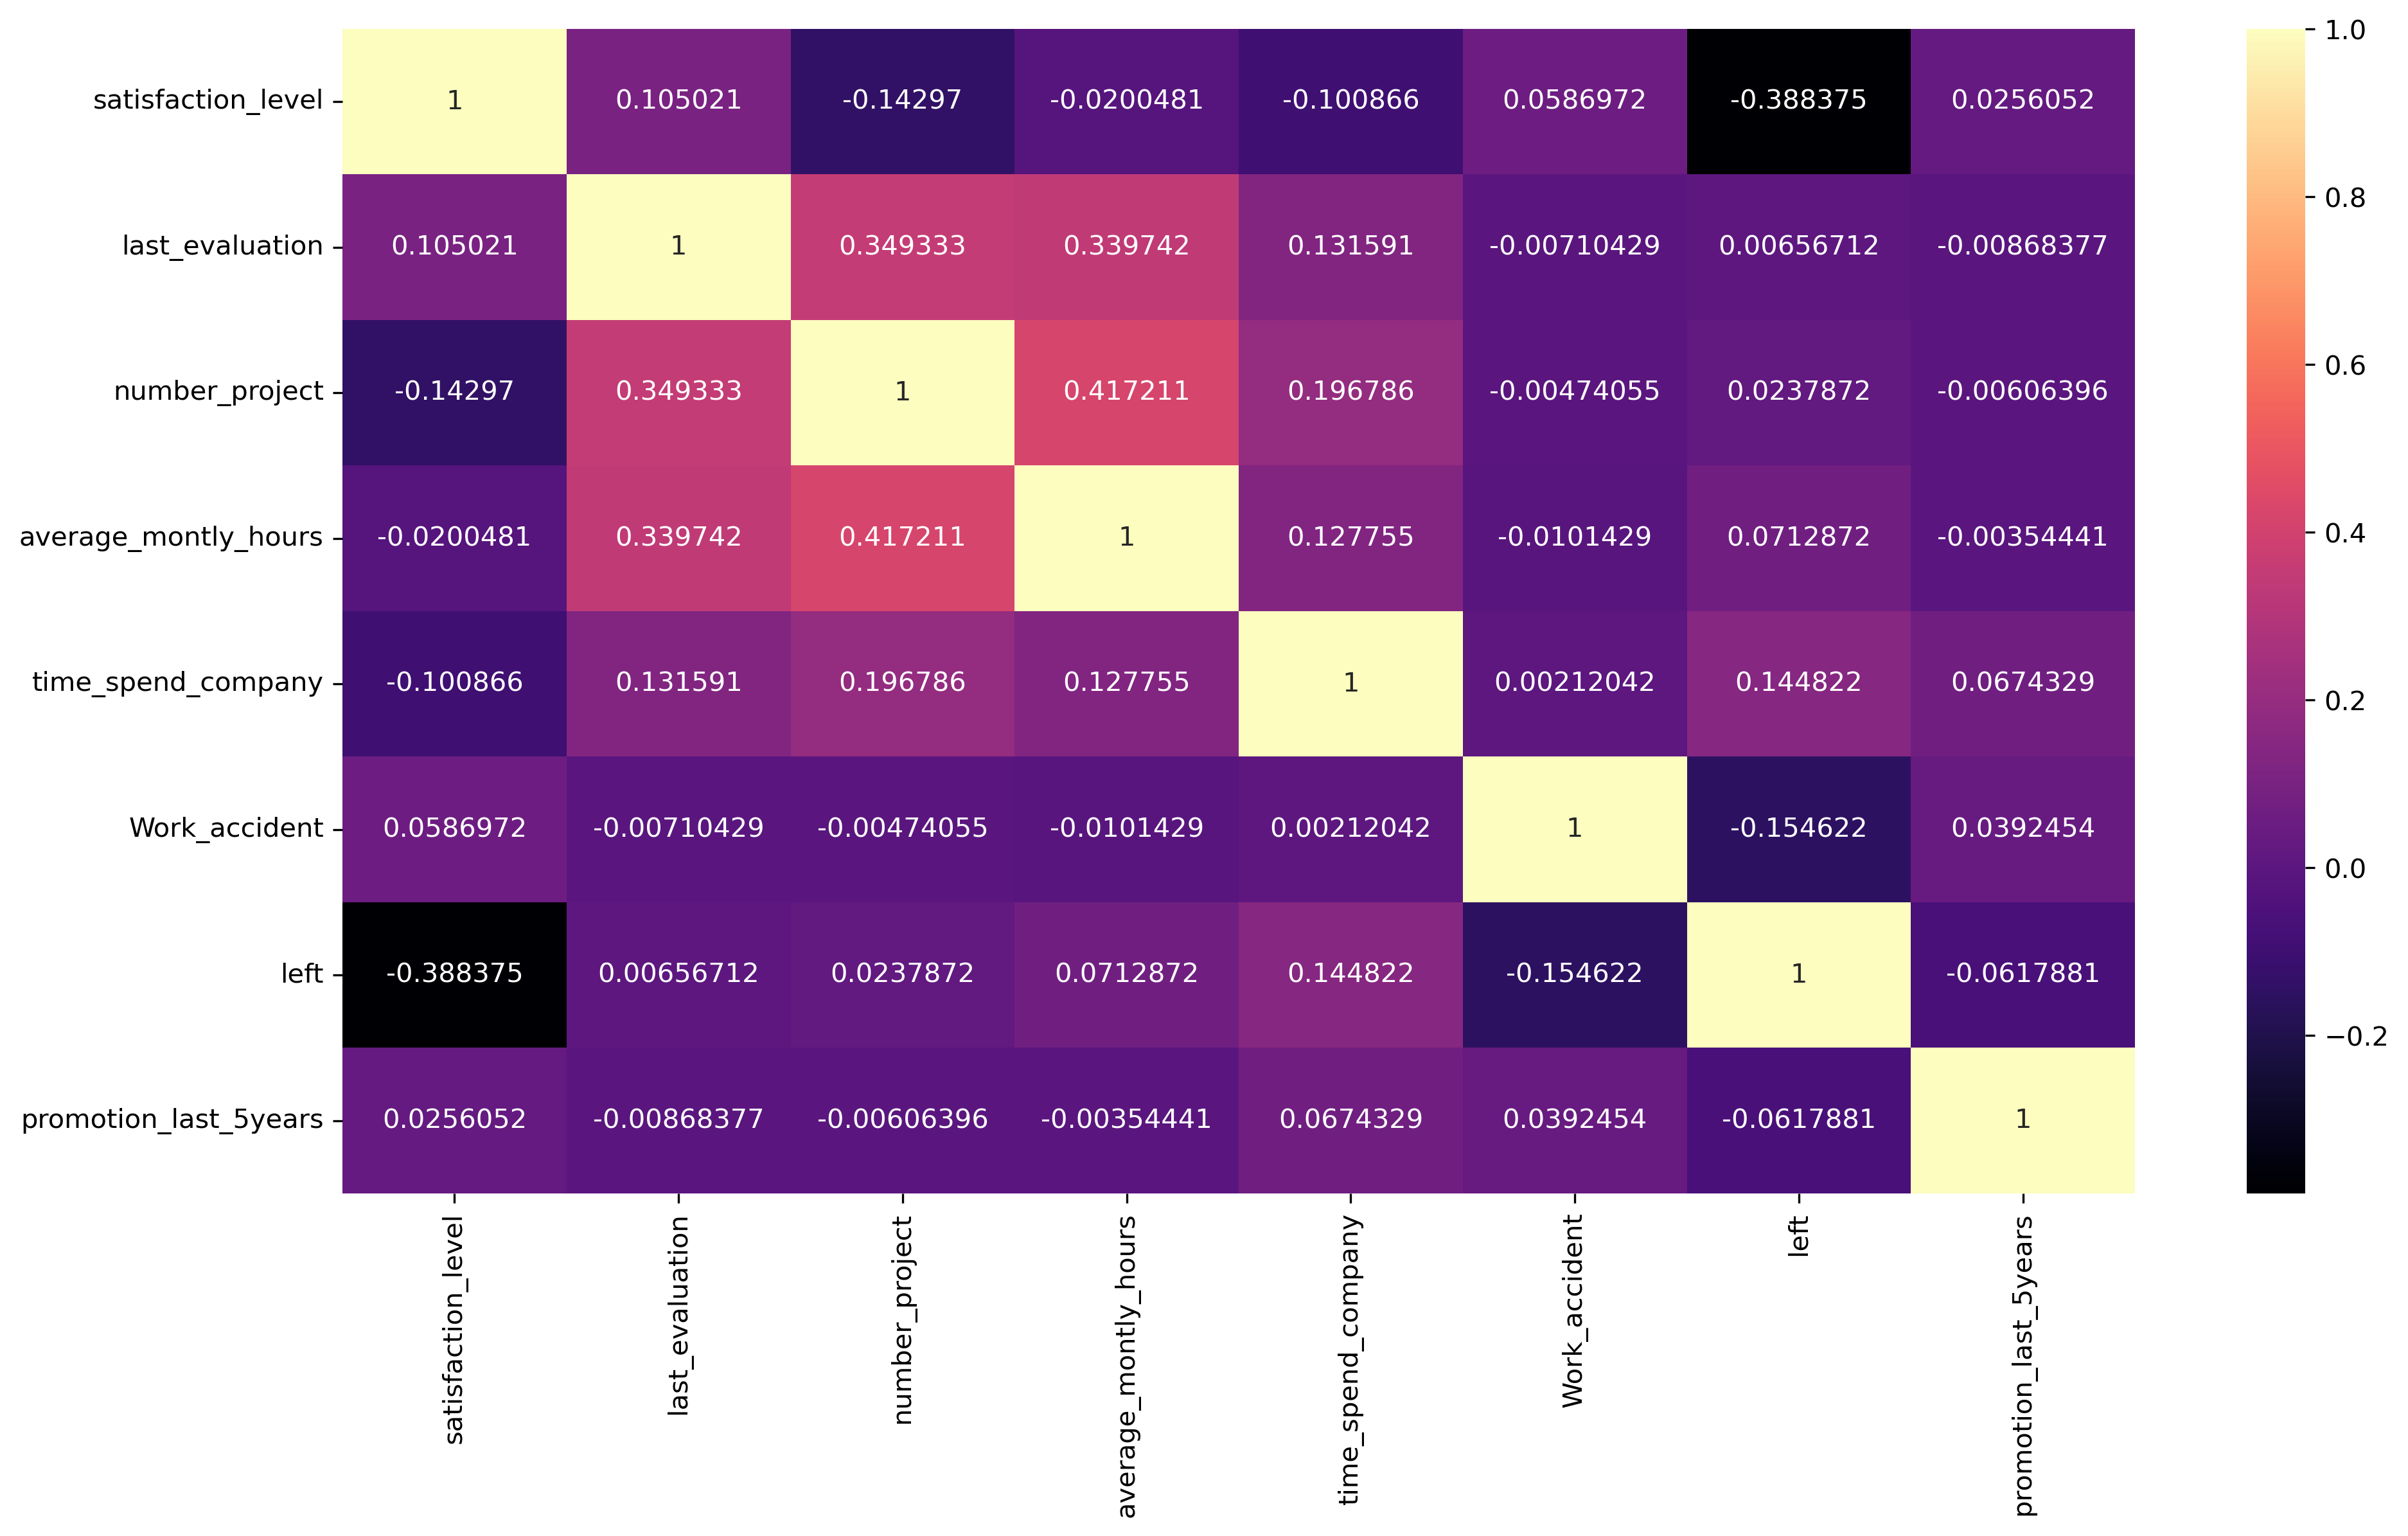

In [10]:
plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(data=df.corr(),annot=True,fmt='g',cmap='magma');

In [11]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
df['satisfaction_level'].value_counts().head(3)

0.10    358
0.11    335
0.74    257
Name: satisfaction_level, dtype: int64

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


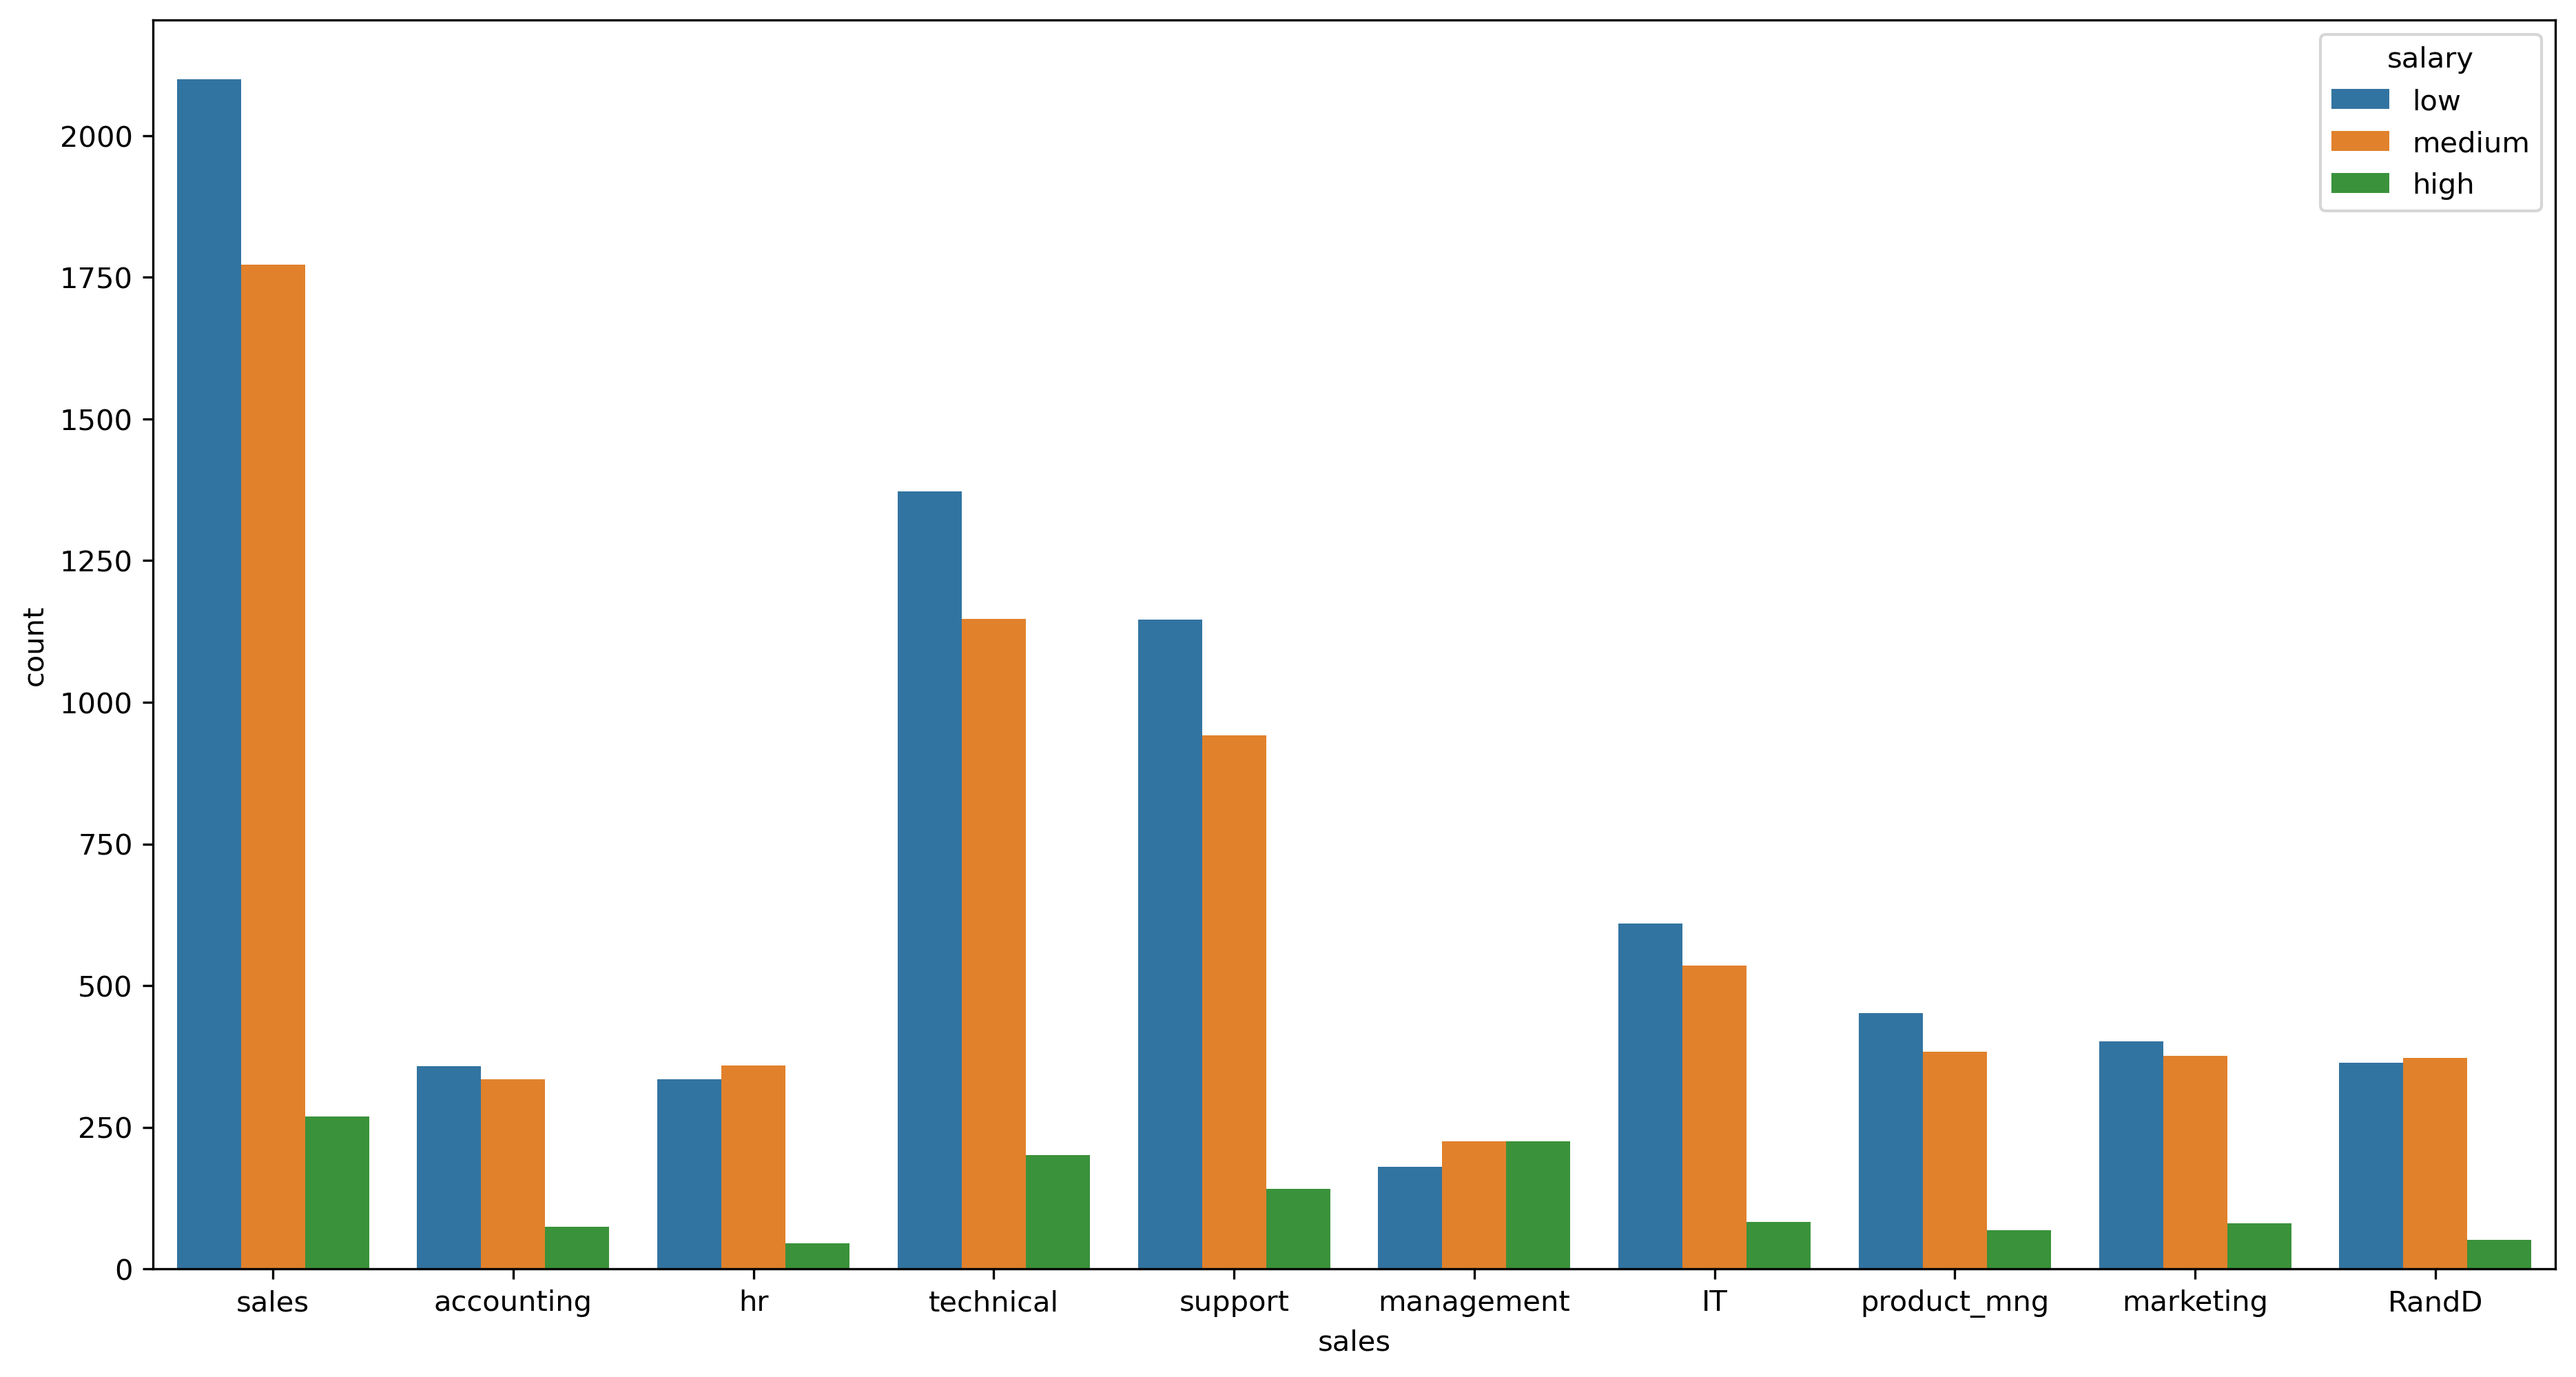

In [14]:
plt.figure(figsize=(15,8),dpi=300)
sns.countplot(x=df['sales'],hue=df['salary']);

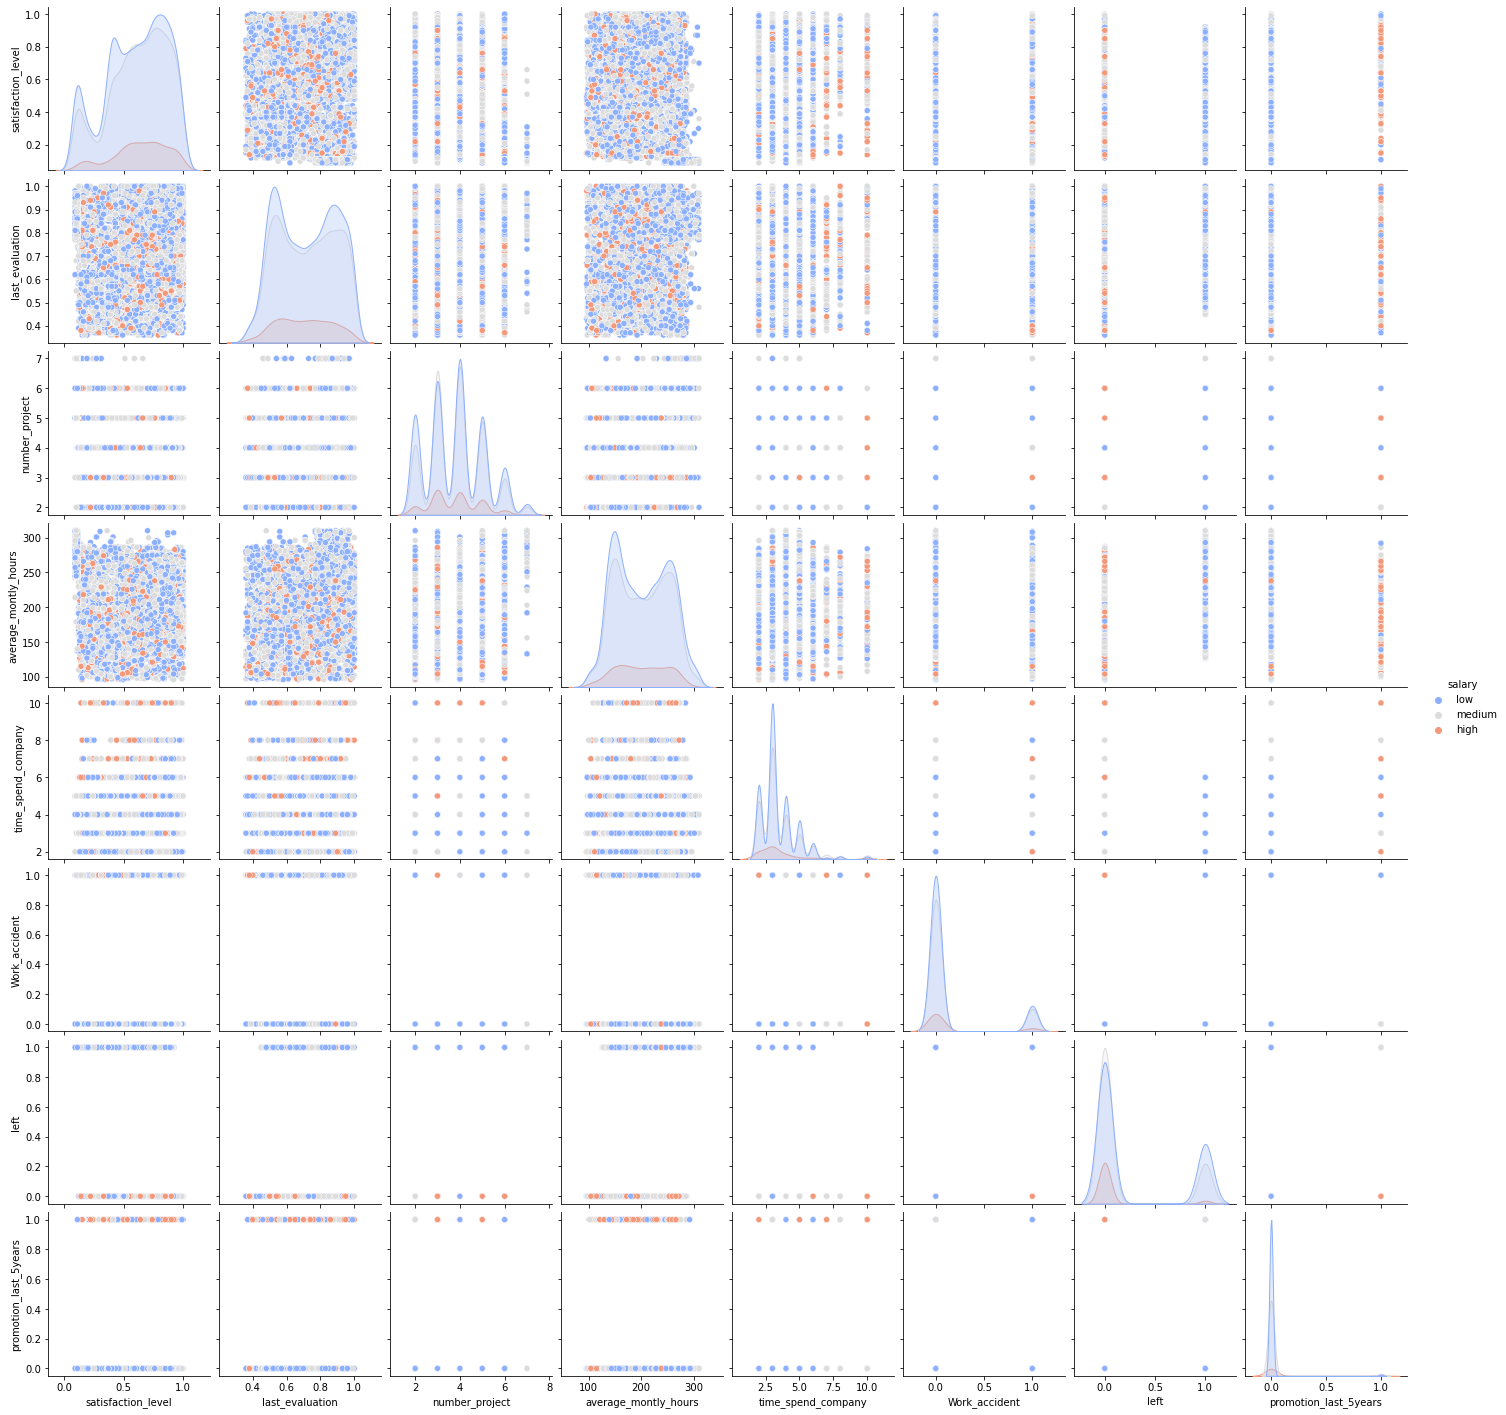

In [15]:
sns.pairplot(df,hue='salary',palette='coolwarm');

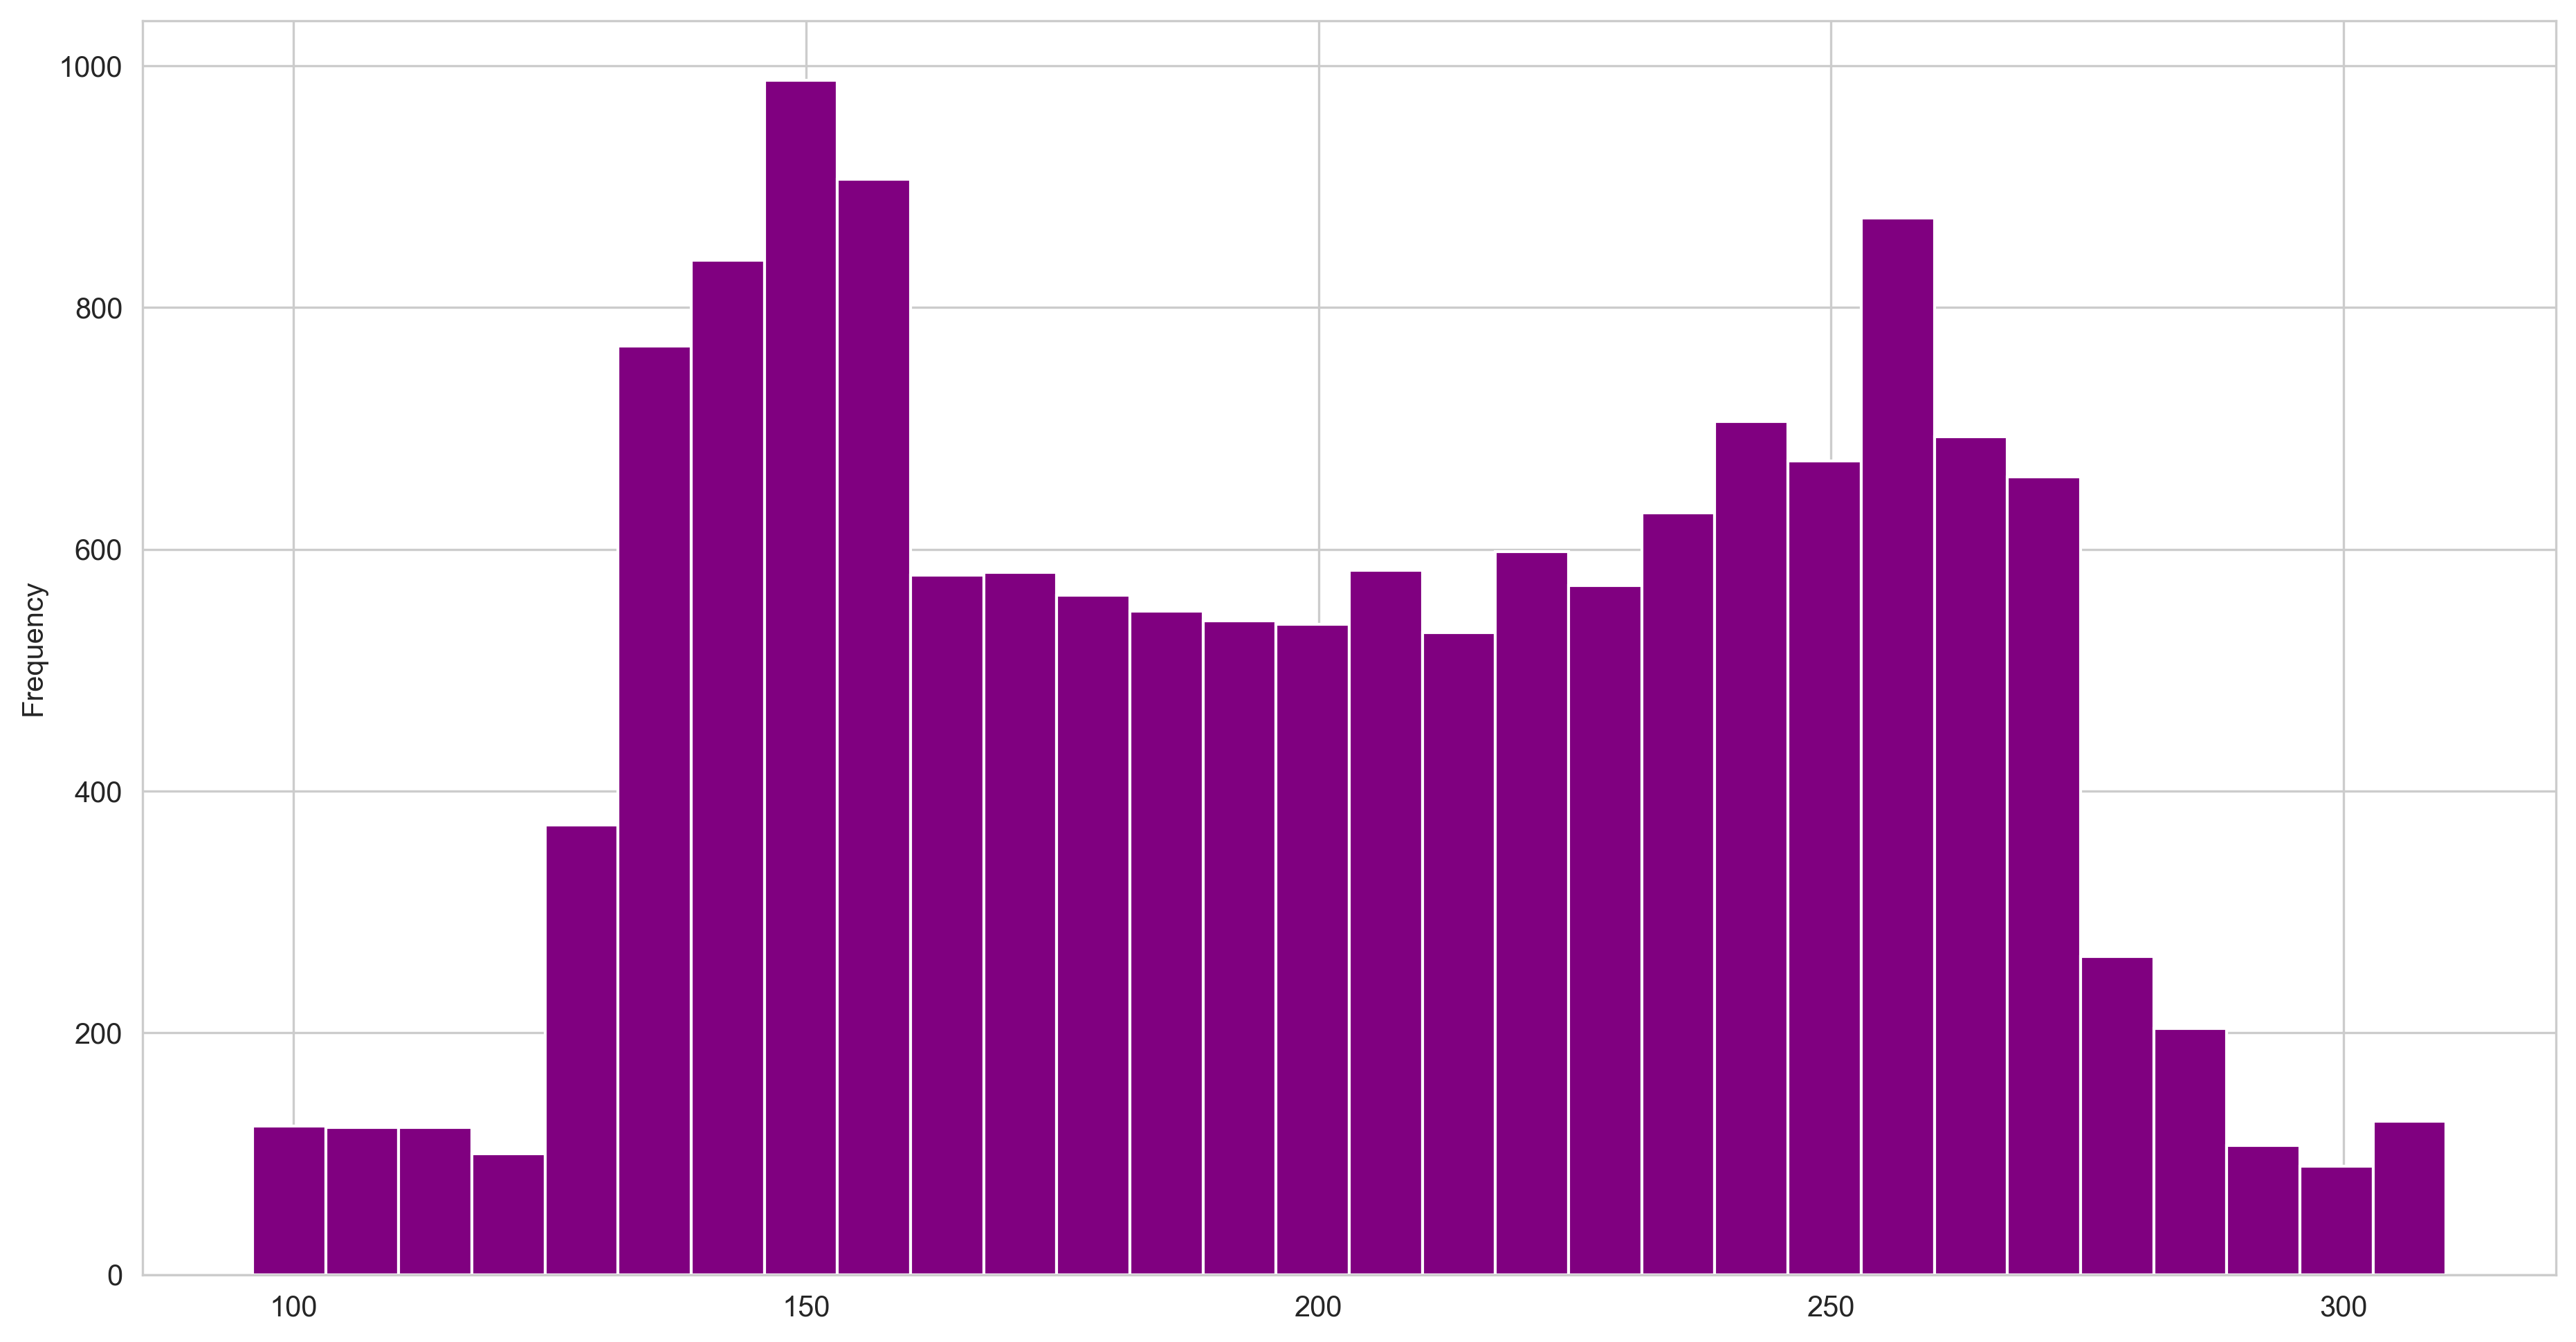

In [16]:
plt.figure(figsize=(15,8),dpi=300)
sns.set_style('whitegrid')
df['average_montly_hours'].plot(kind='hist',bins=30,color='purple');

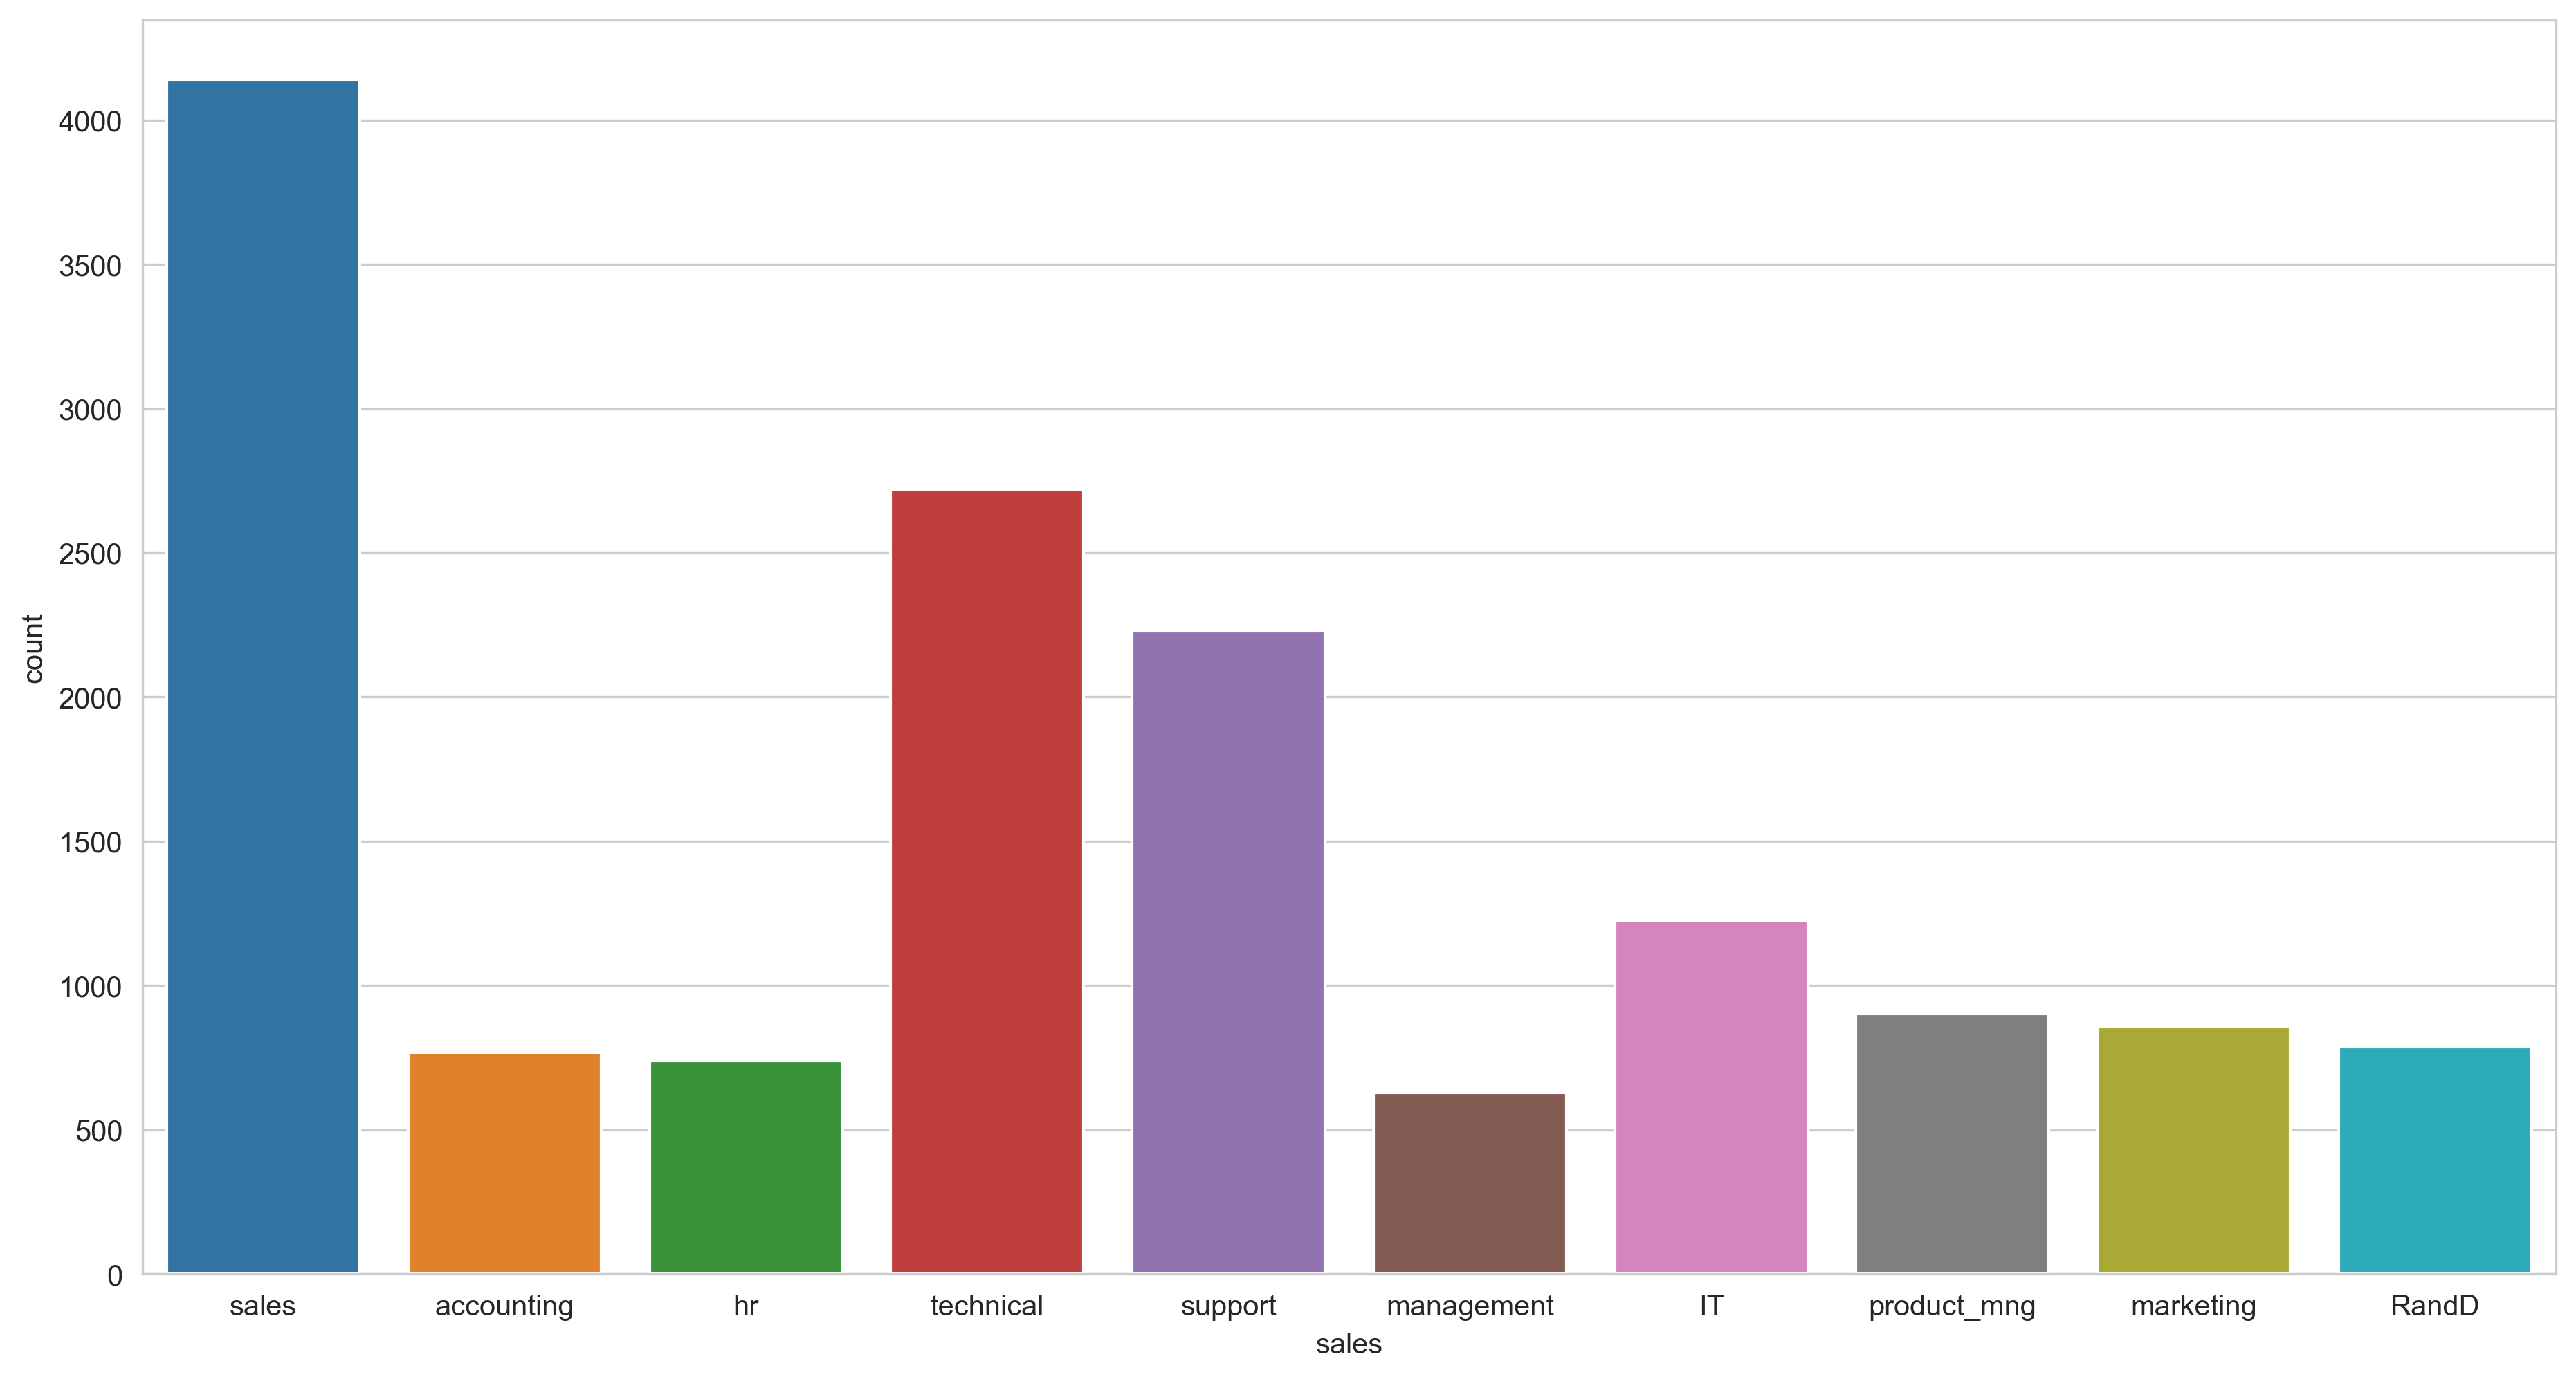

In [17]:
plt.figure(figsize=(15,8),dpi=300)
sns.countplot(x=df['sales']);

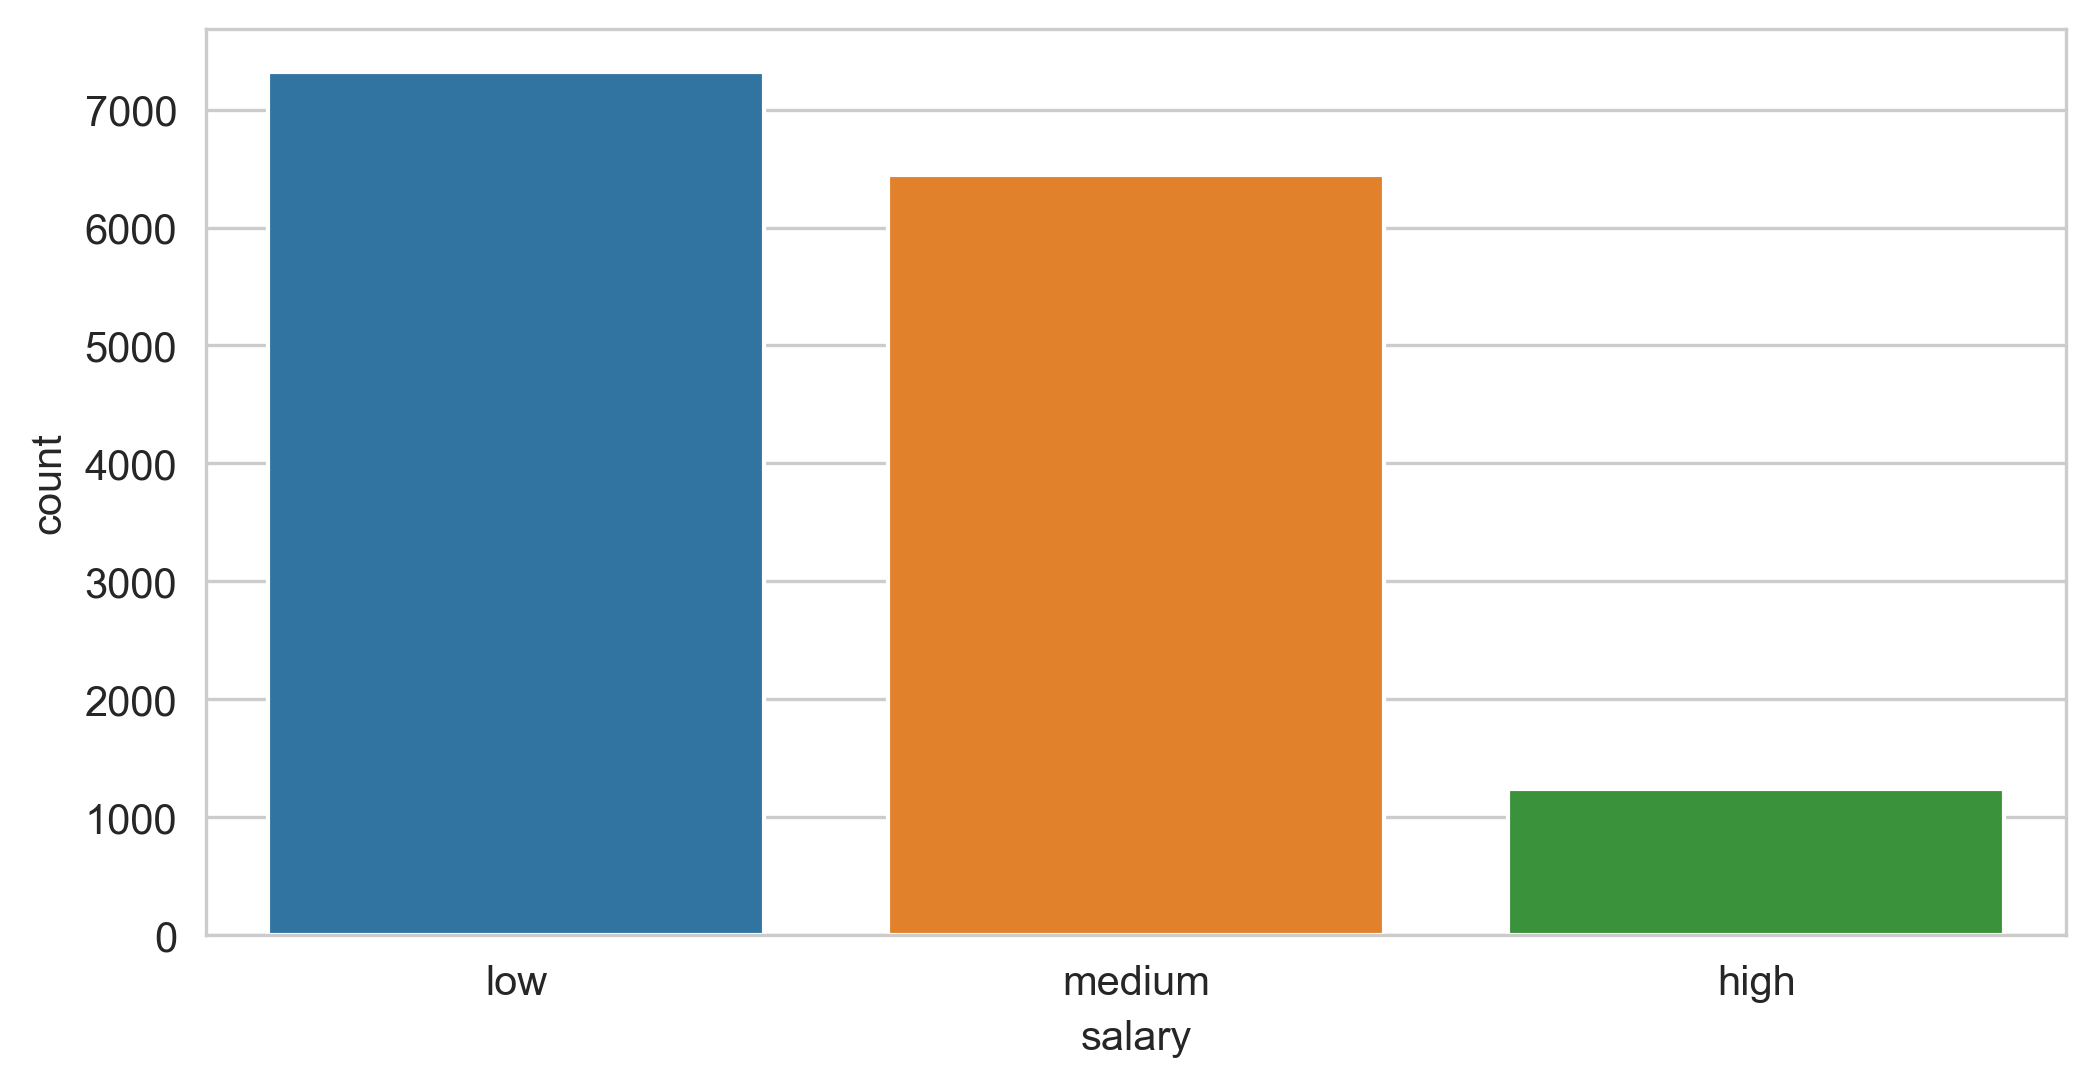

In [18]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x=df['salary']);

## Get dummies for the categorical column

In [19]:
salary=pd.get_dummies(df['salary'],drop_first=True)

In [20]:
df=pd.concat((df,salary),axis=1)

In [21]:
df=df.drop((['sales','salary']),axis=1)

In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0


## Building logistic regression model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop('left',axis=1)
y=df['left']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lm=LogisticRegression()

In [28]:
lm.fit(X_train,y_train)

LogisticRegression()

## Dealing with the predictions

In [29]:
predictions=lm.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))

[[3172  259]
 [ 678  391]]


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3431
           1       0.60      0.37      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500



## Testing the model 
### To test the model have to pass all the list of values require to train the X of model.

> Taking values from user

In [33]:
satisfaction_level=float(input('Satisfaction Level(0 to 1):'))
last_evaluation=float(input('Last Evaluation(0 to 1):'))
number_project=float(input('Number of Project :'))
average_montly_hours=float(input('Average Monthly Hours :'))
time_spend_company=float(input('Time Spend in company(in years):'))
Work_accident=float(input('Work accident(0=False,1=True):'))
promotion_last_5years=float(input('Promotion last five years(0=False,1=True) :'))
low=float(input('Low :0=False,1=True)'))
medium=float(input('Medium :0=False,1=True)'))

Satisfaction Level(0 to 1):0.10
Last Evaluation(0 to 1):0.2
Number of Project :1
Average Monthly Hours :450
Time Spend in company(in years):6
Work accident(0=False,1=True):0
Promotion last five years(0=False,1=True) :0
Low :0=False,1=True)0
Medium :0=False,1=True)0


In [34]:
predictions=lm.predict([[satisfaction_level,last_evaluation,number_project,average_montly_hours,
                         time_spend_company,Work_accident,promotion_last_5years,low,medium]])
if predictions[0]==0:
    print(em.emojize(':green_circle:'),"Employee is not going to leave the company.",em.emojize(':green_circle:'))
else:
    print(em.emojize(':prohibited:'),'Employee is going to leave the comapany',em.emojize(':prohibited:'))
    
    

🚫 Employee is going to leave the comapany 🚫
